In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
rain = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv',parse_dates=['Date'])
rain.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain.shape

(8425, 23)

In [5]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [6]:
rain.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

-There are a lot of missing values that will be handled later

In [8]:
rain[rain['RainToday'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,2012-02-01,Brisbane,23.6,30.0,NaN,6.8,11.5,E,31.0,ENE,ENE,11.0,13.0,69.0,67.0,1007.5,1005.2,3.0,5.0,27.8,28.1,NaN,No
6881,2014-11-08,Adelaide,21.3,21.9,NaN,NaN,NaN,SW,41.0,SW,WSW,22.0,19.0,61.0,47.0,1017.1,1020.3,NaN,NaN,21.4,19.9,NaN,No
6909,2014-12-06,Adelaide,16.4,23.7,NaN,NaN,NaN,S,43.0,S,SSE,15.0,20.0,63.0,50.0,1012.1,1010.6,NaN,NaN,18.8,21.6,NaN,NaN
6910,2014-12-07,Adelaide,15.8,25.3,NaN,NaN,NaN,WSW,37.0,S,SW,11.0,19.0,67.0,51.0,1008.8,1007.0,NaN,NaN,19.1,24.2,NaN,No


In [11]:
rain[rain['RainToday']=='Yes']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
13,2008-12-14,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,SSW,24.0,20.0,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,No
17,2008-12-18,Albury,13.5,22.9,16.8,NaN,NaN,W,63.0,N,WNW,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,NNW,13.0,9.0,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8373,2012-10-29,Darwin,23.3,34.2,3.2,5.0,10.2,ENE,35.0,NE,NNW,6.0,19.0,60.0,56.0,1011.1,1007.0,3.0,2.0,29.9,32.0,Yes,No
8378,2012-11-03,Darwin,23.2,33.4,31.6,13.0,6.9,SE,48.0,ESE,WNW,9.0,17.0,88.0,58.0,1010.3,1007.0,7.0,2.0,26.0,32.3,Yes,No
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No


In [9]:
for i in rain.columns:
    vc= rain[i].value_counts()
    print(vc)
    print("=="*50)

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall,

In [10]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
rain['Humidity9am'].median()

68.0

#### Handling missing values

In [12]:
#filling missing values in object dtype with mode

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mode()[0])
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mode()[0])
rain['WindGustDir']= rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir9am']= rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindDir3pm']=rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

#filling missing values with mean
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())

rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())

rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())

#filling missing values with median
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].median())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].median())
rain['Rainfall']= rain['Rainfall'].fillna(rain['Rainfall'].median())
rain['Evaporation']= rain['Evaporation'].fillna(rain['Evaporation'].median())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].median())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].median())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].median())



In [13]:
rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- Missing values have been removed

### Seprating month and year into a new column

In [14]:
rain['year']= rain.Date.dt.year
rain['month']= rain.Date.dt.month

In [15]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,4.6,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12


## Data Visualization

In [16]:
numerical =['Date','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
categorical= ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


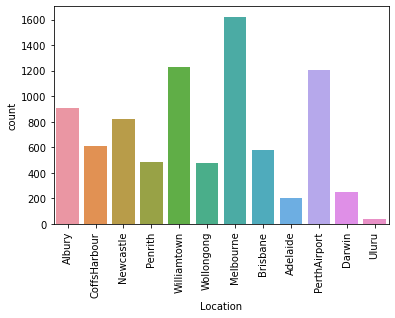

In [17]:
sns.countplot(rain['Location'])
plt.xticks(rotation=90)
print(rain['Location'].value_counts())

plt.show()

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


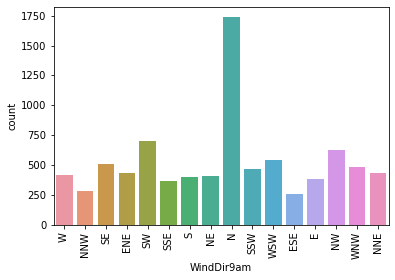

In [88]:
sns.countplot(rain['WindDir9am'])
plt.xticks(rotation=90)
print(rain['WindDir9am'].value_counts())

plt.show()

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


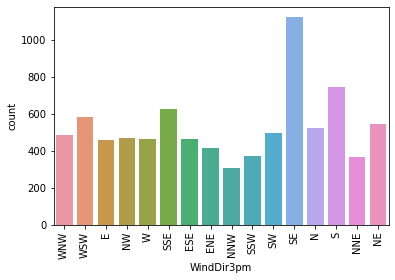

In [21]:
sns.countplot(rain['WindDir3pm'])
plt.xticks(rotation=90)
print(rain['WindDir3pm'].value_counts())

plt.show()

No     6435
Yes    1990
Name: RainToday, dtype: int64


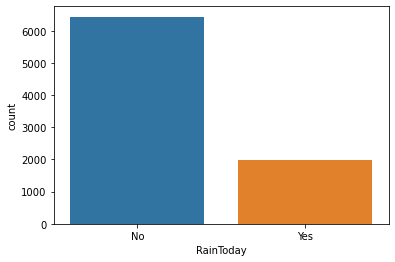

In [18]:
sns.countplot(rain['RainToday'])
print(rain['RainToday'].value_counts())

plt.show()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


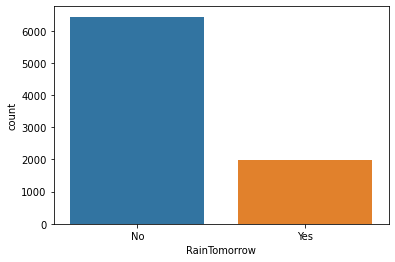

In [19]:
sns.countplot(rain['RainTomorrow'])
print(rain['RainTomorrow'].value_counts())
plt.show()

In [20]:
pd.set_option('display.max_rows', None)
rain[rain['year']== 2008]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,Albury,13.400000,22.900000,0.6,4.6,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.900000,21.800000,No,No,2008,12
1,2008-12-02,Albury,7.400000,25.100000,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.200000,24.300000,No,No,2008,12
2,2008-12-03,Albury,12.900000,25.700000,0.0,4.6,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.000000,23.200000,No,No,2008,12
3,2008-12-04,Albury,9.200000,28.000000,0.0,4.6,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.100000,26.500000,No,No,2008,12
4,2008-12-05,Albury,17.500000,32.300000,1.0,4.6,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.800000,29.700000,No,No,2008,12
5,2008-12-06,Albury,14.600000,29.700000,0.2,4.6,7.632205,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,7.0,7.0,20.600000,28.900000,No,No,2008,12
6,2008-12-07,Albury,14.300000,25.000000,0.0,4.6,7.632205,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,7.0,18.100000,24.600000,No,No,2008,12
7,2008-12-08,Albury,7.700000,26.700000,0.0,4.6,7.632205,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,7.0,7.0,16.300000,25.500000,No,No,2008,12
8,2008-12-09,Albury,9.700000,31.900000,0.0,4.6,7.632205,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.300000,30.200000,No,Yes,2008,12
9,2008-12-10,Albury,13.100000,30.100000,1.4,4.6,7.632205,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,7.0,7.0,20.100000,28.200000,Yes,No,2008,12


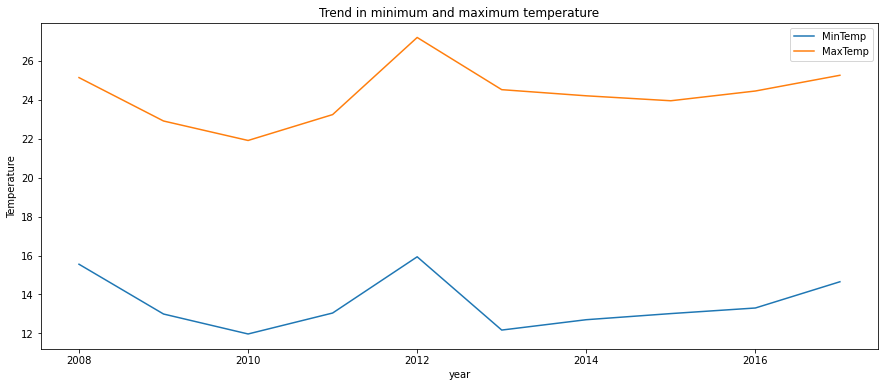

In [21]:
x=rain.groupby(['year'])['MinTemp','MaxTemp'].mean()
x.plot(kind='line',figsize=(15,6))
plt.ylabel('Temperature')
plt.title('Trend in minimum and maximum temperature')
plt.show()

- The MinTemp and MaxTemp line plots both show similar trend.
- From 2008 onwards there was a gradual decrease in temperature. In 2012 there was a sudden spike and is followed by a drop.
- Since 2013 there is a gradual increase in temperature

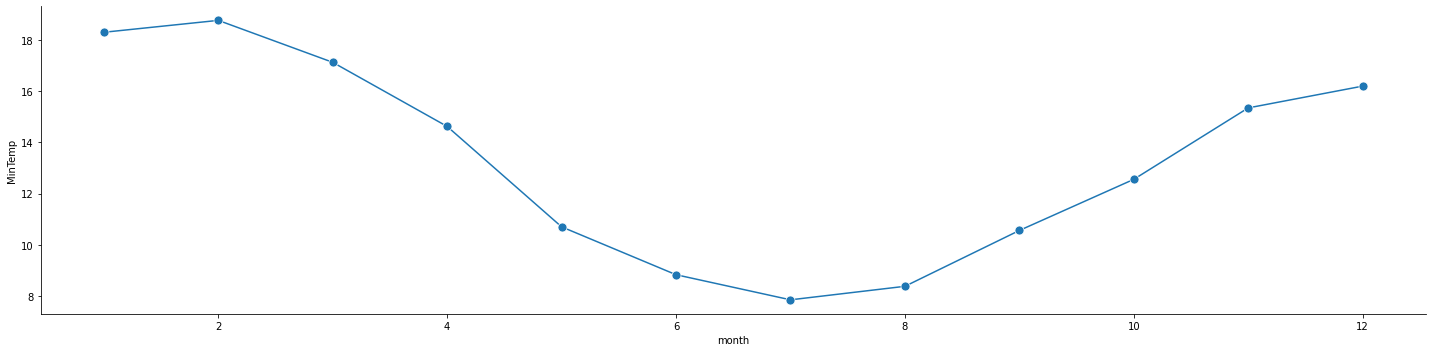

In [22]:
p = sns.relplot(kind='line',data=rain, x='month', y='MinTemp', aspect=4, marker='o',markersize=9,ci=None)


#### Month wise variation in rainfall

<AxesSubplot:xlabel='month', ylabel='Rainfall'>

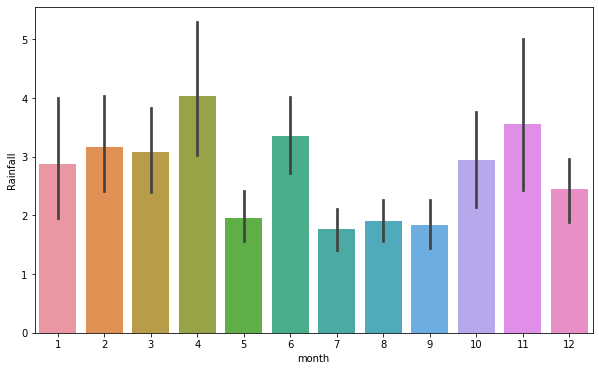

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='Rainfall',data=rain)


#### Yearly trend in rainfall

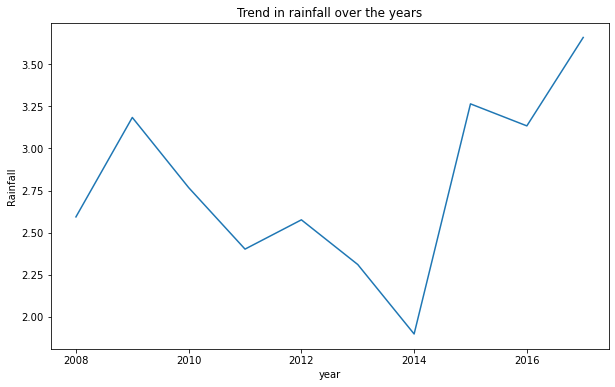

In [24]:
x=rain.groupby(['year'])['Rainfall'].mean()
x.plot(kind='line',figsize=(10,6))
plt.ylabel('Rainfall')
plt.title('Trend in rainfall over the years')
plt.show()

- As visualized, 2009 onwards, the graph for rainfall showed a downwards trend which is followed by a steep increase since 2014 

#### Variation in number of hours of Bright sun 

Text(0, 0.5, 'Hours')

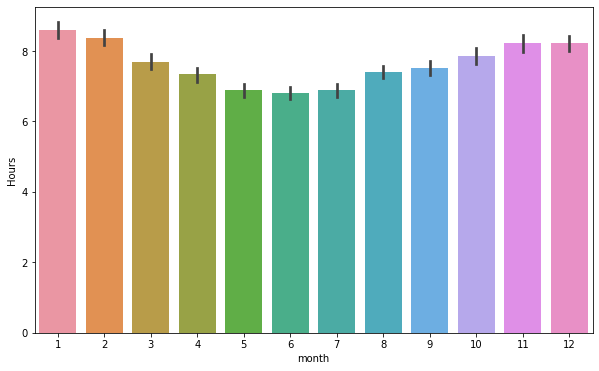

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='Sunshine',data=rain)
plt.ylabel('Hours')


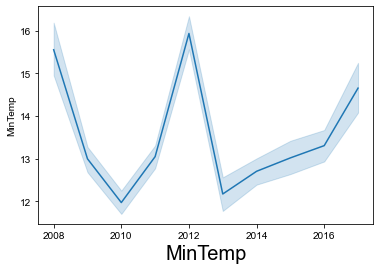

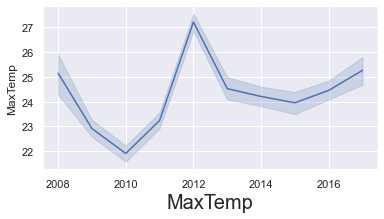

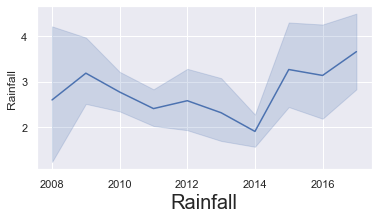

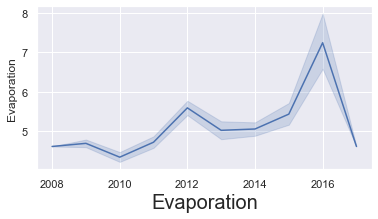

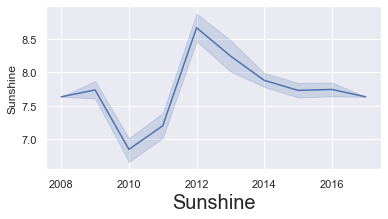

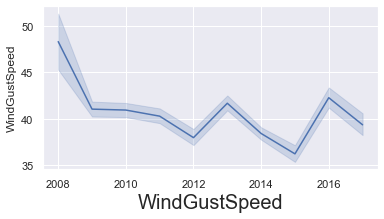

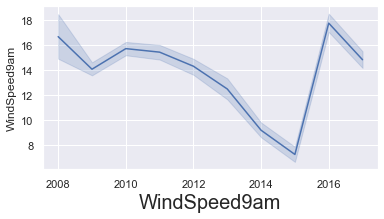

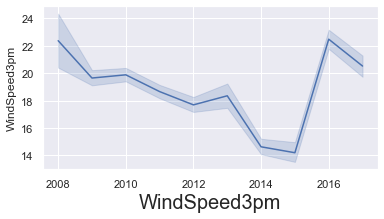

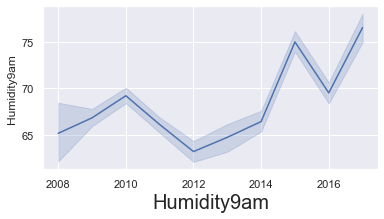

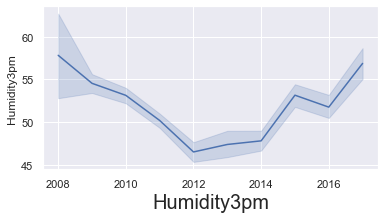

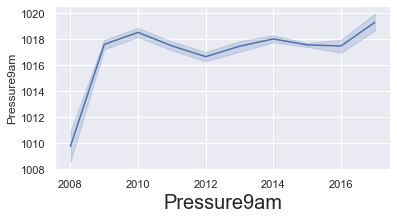

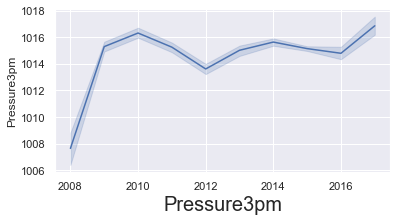

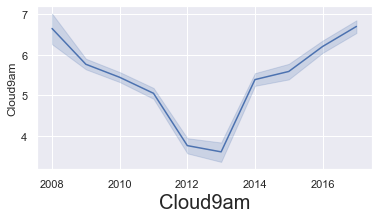

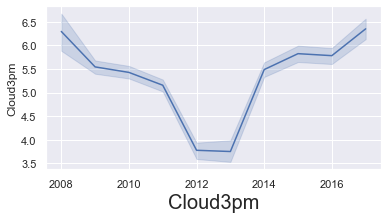

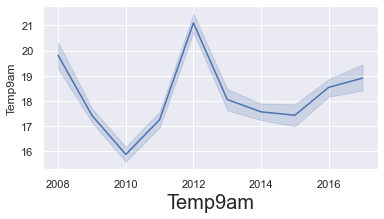

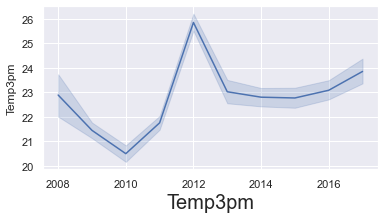

In [26]:

for i in rain.columns:
    
    plotnumber=1
    if rain[i].dtype == 'float64':
        
        if plotnumber <= 18:
            sns.lineplot(x='year',y=i,data=rain)
            plt.xlabel(i,fontsize=20)
            sns.set(rc={'figure.figsize':(6,3)})

    plotnumber +=1
    plt.show()


## Features vs Label

#### Rainfall vs features

#### RainTomorrow vs features

<AxesSubplot:xlabel='Location'>

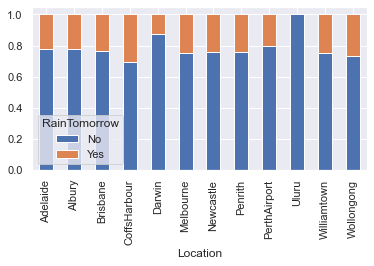

In [27]:
pd.crosstab(rain['Location'],rain['RainTomorrow'], normalize='index').plot.bar(stacked=True)


- CoffHarbour shows higher percentage as compared to others for RainTomorrow

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

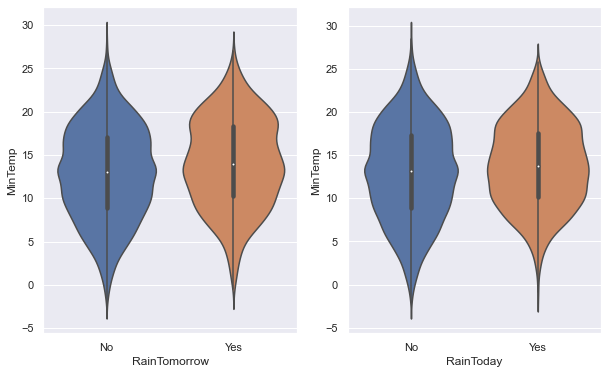

In [28]:
fig, axes = plt.subplots(1,2, figsize=[10, 6])
sns.violinplot(x='RainTomorrow',y ='MinTemp',data=rain,ax=axes[0])
sns.violinplot(x='RainToday',y ='MinTemp',data=rain,ax=axes[1])


<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

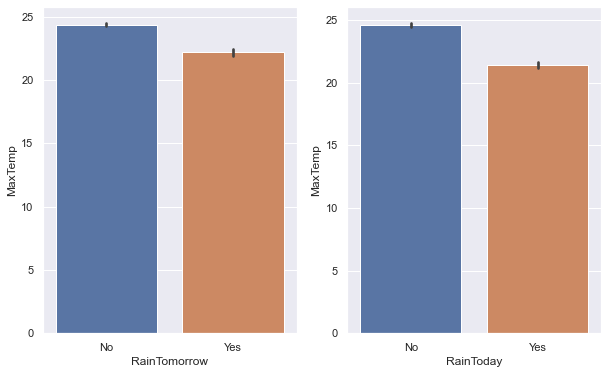

In [29]:
fig, axes = plt.subplots(1,2, figsize=[10, 6])
sns.barplot(x='RainTomorrow',y ='MaxTemp',data=rain,ax=axes[0])
sns.barplot(x='RainToday',y ='MaxTemp',data=rain,ax=axes[1])


<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

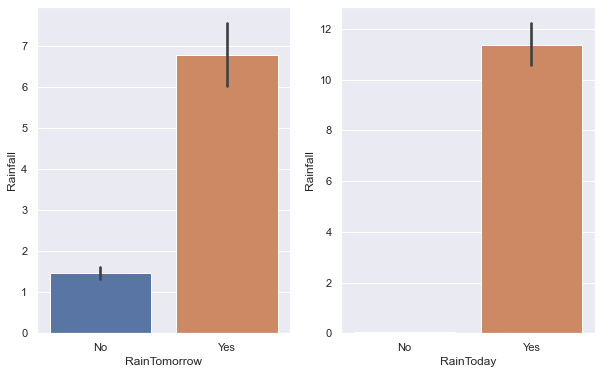

In [30]:
fig, axes = plt.subplots(1,2, figsize=[10, 6])
sns.barplot(x='RainTomorrow',y ='Rainfall',data=rain,ax=axes[0])
sns.barplot(x='RainToday',y ='Rainfall',data=rain,ax=axes[1])


- Whenever it was predicted as No for RainTomorrow, the average rainfall that was recorded around 1.5mm
- Whenever it was predicted as Yes for RainTomorrow, the average rainfall that was recorded around 6.5mm


<AxesSubplot:xlabel='RainToday', ylabel='Sunshine'>

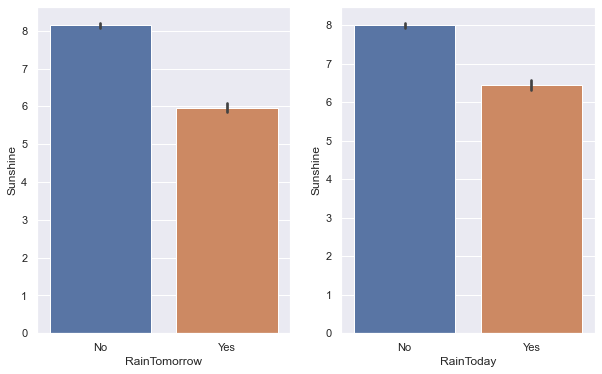

In [31]:
fig, axes = plt.subplots(1,2, figsize=[10, 6])
sns.barplot(x='RainTomorrow',y ='Sunshine',data=rain,ax=axes[0])
sns.barplot(x='RainToday',y ='Sunshine',data=rain,ax=axes[1])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

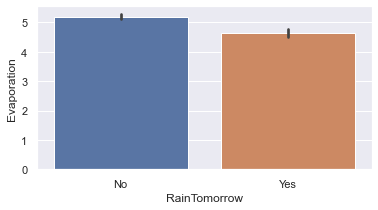

In [32]:
sns.barplot(x='RainTomorrow',y ='Evaporation',data=rain)


<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

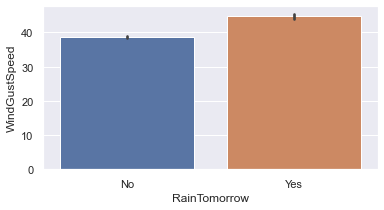

In [33]:
sns.barplot(x='RainTomorrow',y ='WindGustSpeed',data=rain)


<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed9am'>

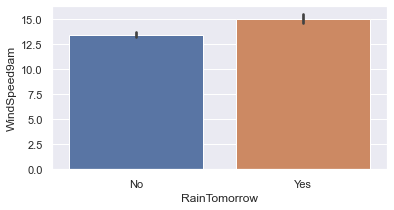

In [175]:
sns.barplot(x='RainTomorrow',y ='WindSpeed9am',data=rain)


<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

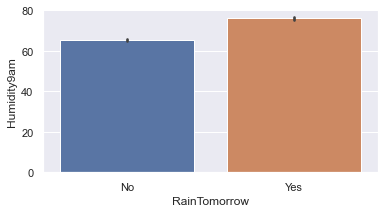

In [34]:
sns.barplot(x='RainTomorrow',y ='Humidity9am',data=rain)


<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

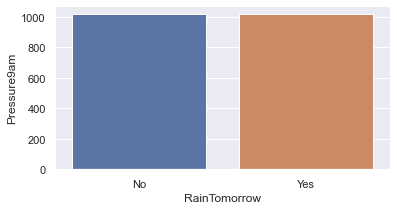

In [35]:
sns.barplot(x='RainTomorrow',y ='Pressure9am',data=rain)


<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp9am'>

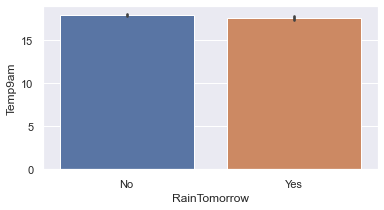

In [178]:
sns.barplot(x='RainTomorrow',y ='Temp9am',data=rain)


#### Rainfall vs Features

In [179]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month'],
      dtype='object')

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

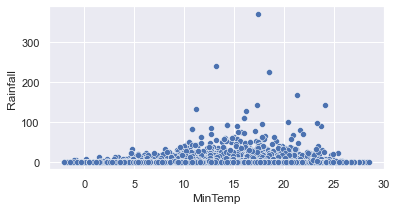

In [36]:
sns.scatterplot(x='MinTemp',y='Rainfall',data= rain)

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

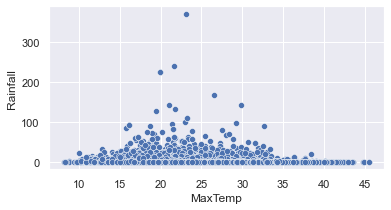

In [37]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data= rain)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

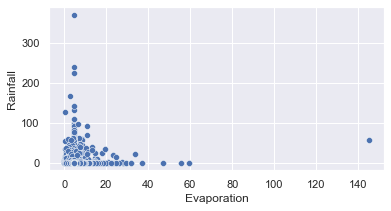

In [38]:
sns.scatterplot(x='Evaporation',y='Rainfall',data= rain)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

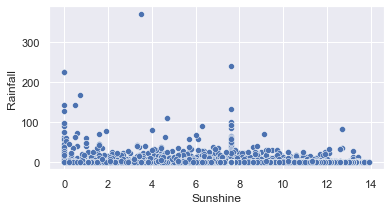

In [39]:
sns.scatterplot(x='Sunshine',y='Rainfall',data= rain)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

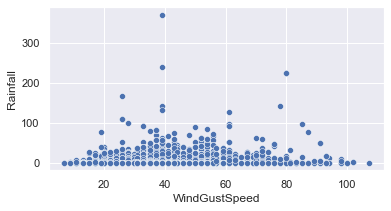

In [40]:
sns.scatterplot(x='WindGustSpeed',y='Rainfall',data= rain)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

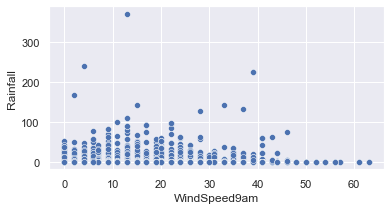

In [42]:
sns.scatterplot(x='WindSpeed9am',y='Rainfall',data= rain)

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

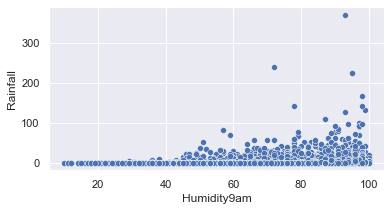

In [43]:
sns.scatterplot(x='Humidity9am',y='Rainfall',data= rain)

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

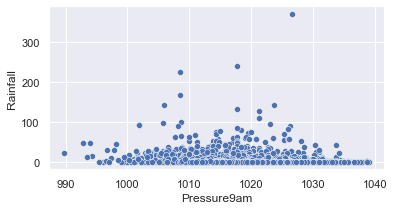

In [44]:
sns.scatterplot(x='Pressure9am',y='Rainfall',data= rain)

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

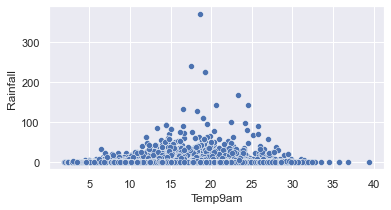

In [45]:
sns.scatterplot(x='Temp9am',y='Rainfall',data= rain)

- None of the graph shows a linear relationship

## Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in rain.columns:
    if rain[i].dtype== 'object':
        rain[i] = enc.fit_transform(rain[i].values)

In [47]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12
1,2008-12-02,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,2008,12
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12
3,2008-12-04,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,2008,12
4,2008-12-05,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12


In [196]:
#Descriptive statistics
rain.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.725982,5.060332,7.632205,7.217804,40.036320,7.267418,7.810445,13.840000,18.539585,67.823739,51.246766,1017.640233,1015.236075,5.265875,5.230742,17.762015,22.442934,0.236202,0.236320,2012.102433,6.442136
std,3.162654,5.379488,6.114516,10.319872,3.871619,2.825451,4.702616,13.781296,4.588045,4.430162,10.128896,9.704899,16.774237,18.311914,6.275759,6.217451,2.667166,2.564122,5.608301,5.945849,0.424773,0.424846,2.473137,3.437994
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,2010.000000,3.000000
50%,6.000000,13.200000,23.300000,0.000000,4.600000,7.632205,7.000000,39.000000,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,7.000000,7.000000,17.762015,22.000000,0.000000,0.000000,2011.000000,6.000000
75%,8.000000,17.300000,28.000000,0.800000,5.200000,8.900000,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,2014.000000,9.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,2017.000000,12.000000


- We can observe there are no null values
- There are some right skewed and left skewed data when we observe the mean and median values in each column
- standard deviation gives an idea how spread apart the data is.

## Correlation

In [48]:
corr= rain.corr()

<AxesSubplot:>

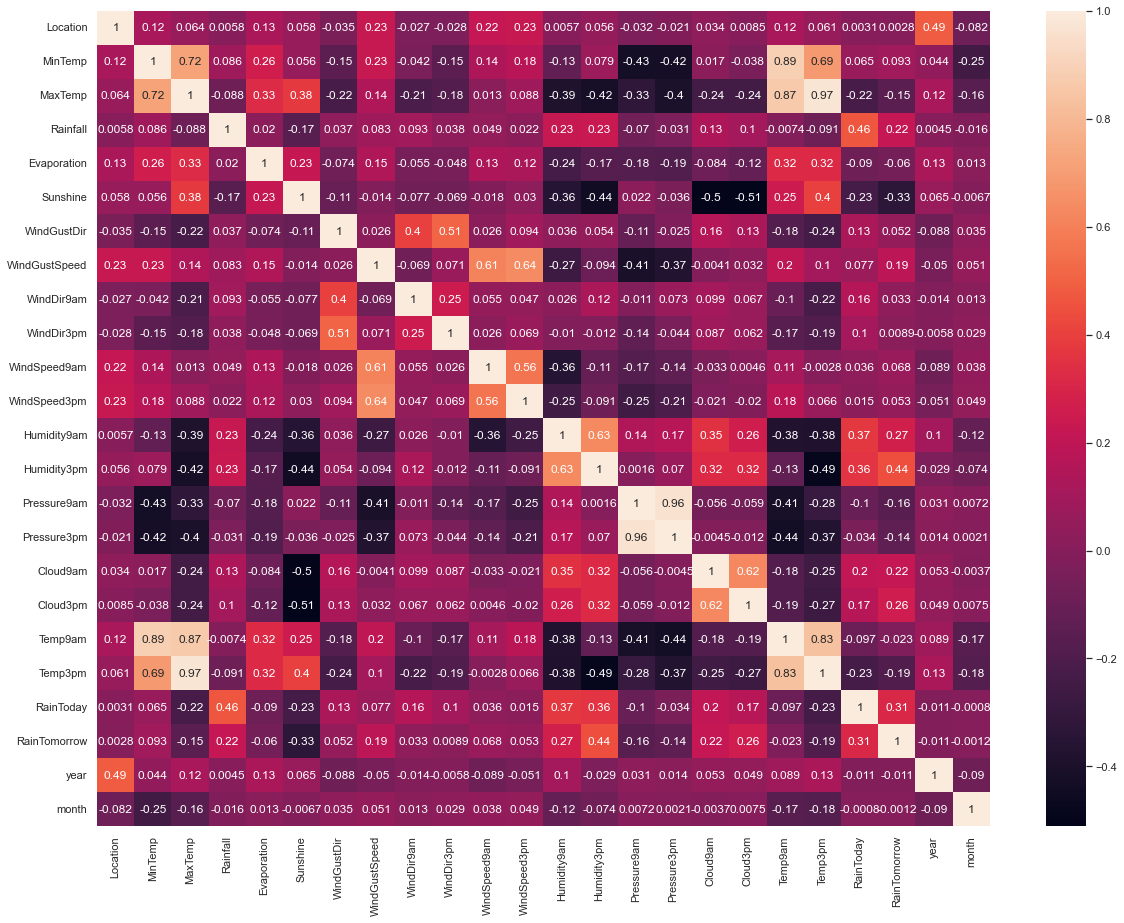

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot = True)

- Here we can visualise the correlation between the features and feature and label.
- Rain tomorrow is positively correlated with Humidity, Rainfall, WindGustSpeed, Cloud.
- Rainfall is positively correlated with Humidity, RainToday and so on.
- We can observe features with negative correlation aswell
- Values close to zero have least correlation.

#### Distibution of data

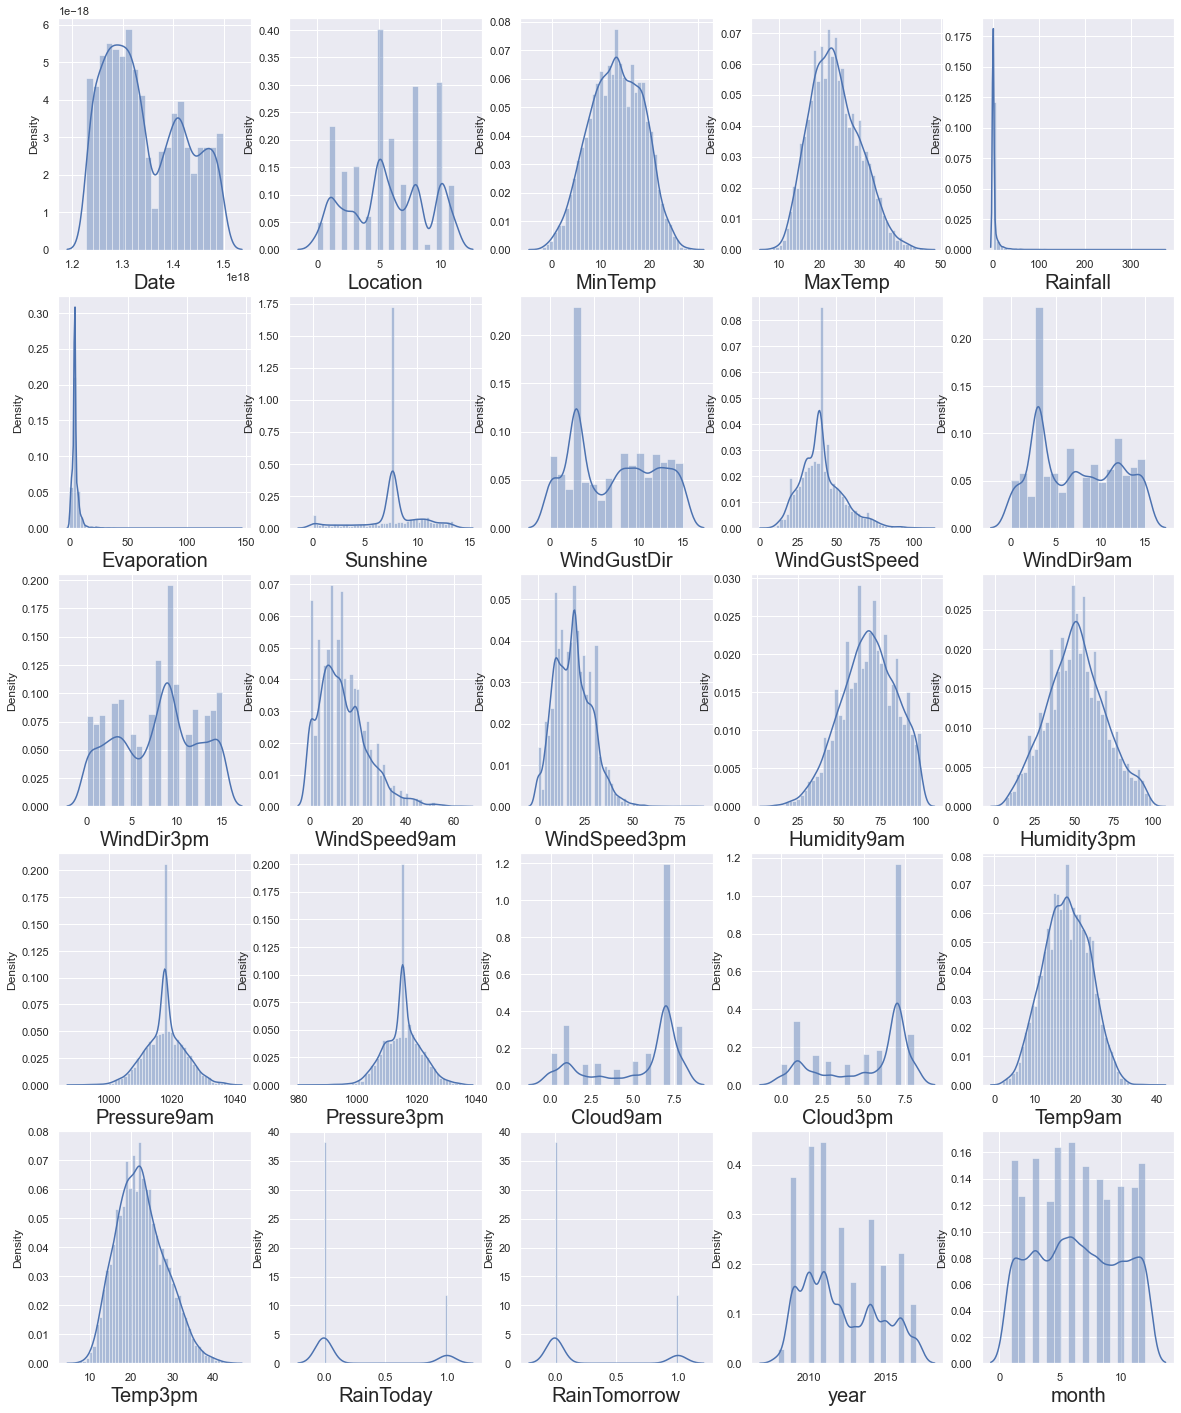

In [50]:
plt.figure(figsize =(20,35), facecolor='white')
plotnumber=1
for i in rain.columns:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(rain[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

- Evaporation and Temperature are highly right skewed
- We see some left skewed data aswell
- we do not consider the skewness/ distribution of categorical data

### Checking for Outliers

In [208]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month'],
      dtype='object')

In [51]:
f= rain[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

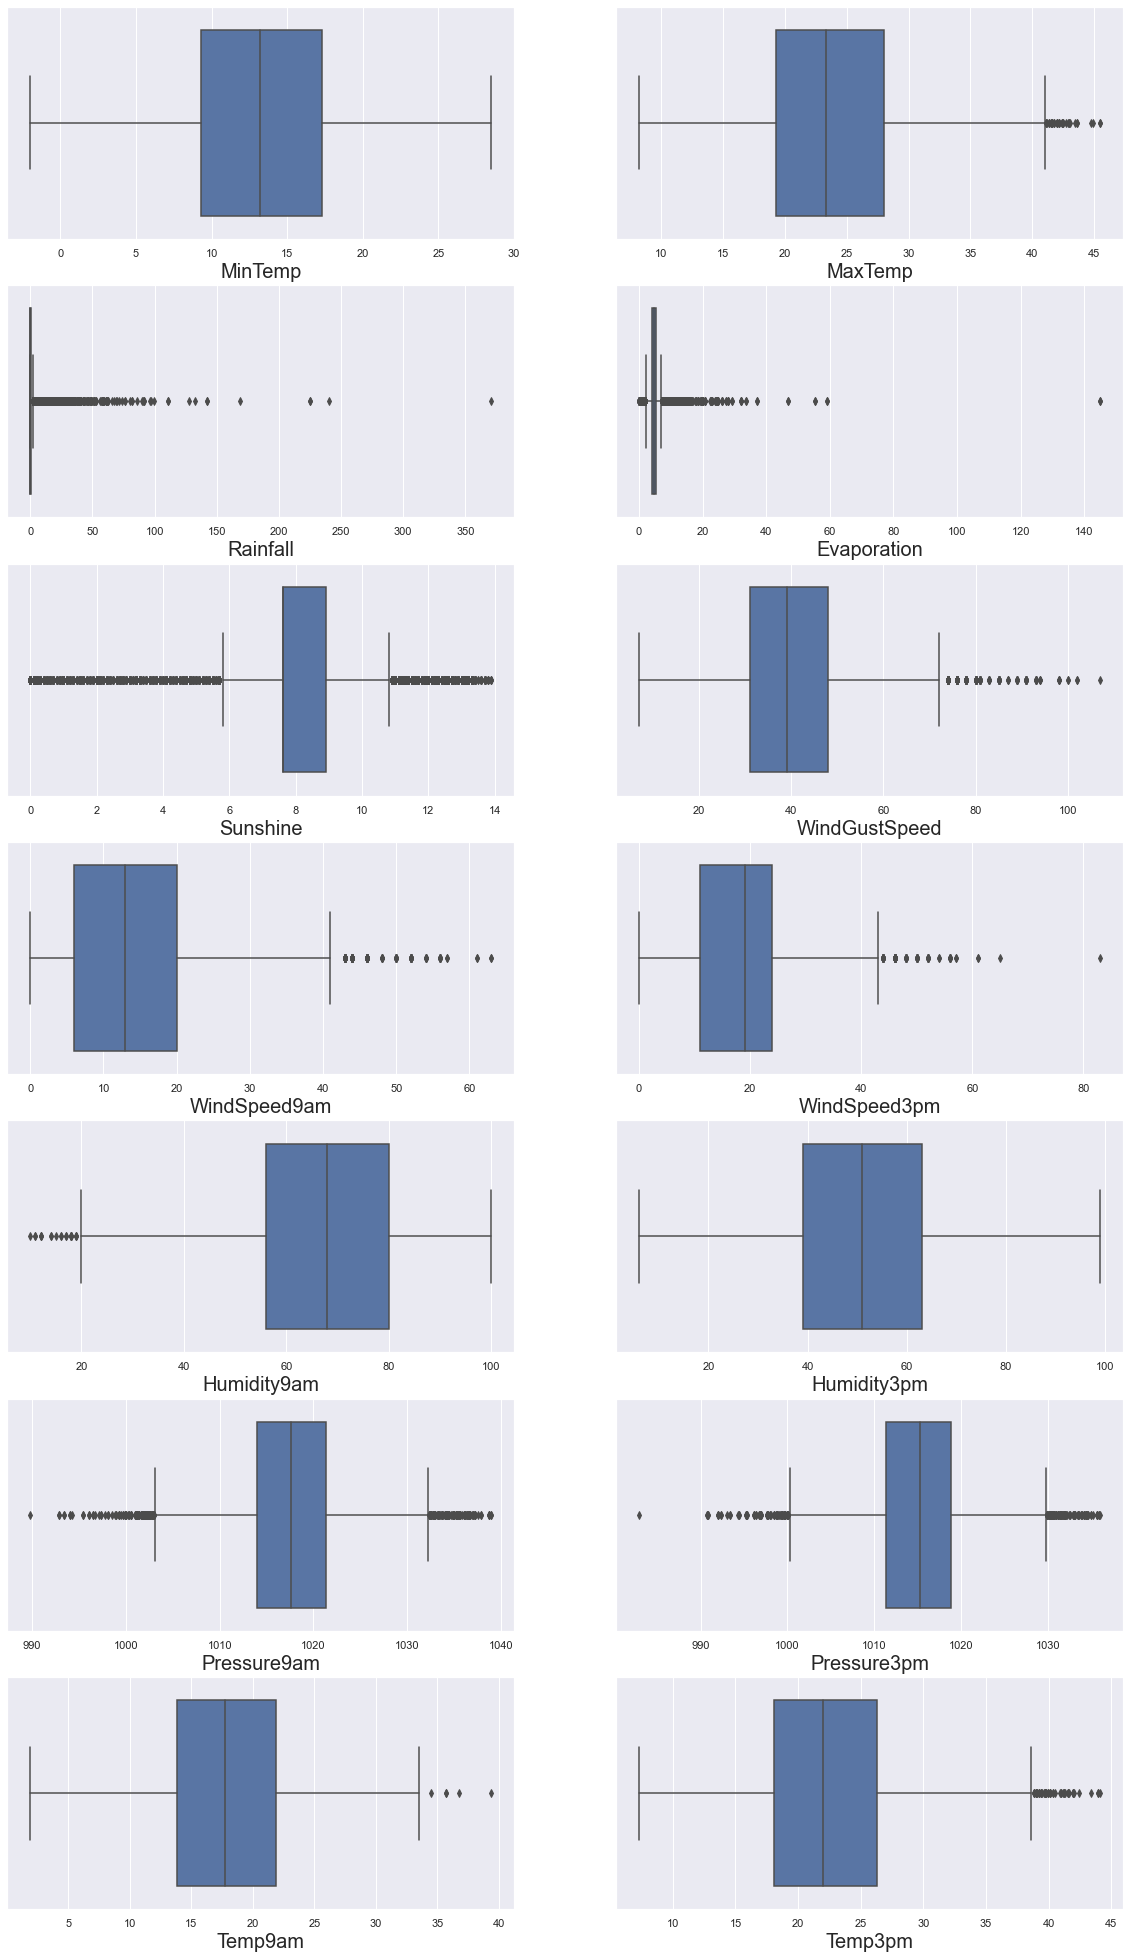

In [52]:
plt.figure(figsize =(20,35), facecolor='white')
plotnumber=1
for i in f.columns:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(f[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

- We can observe outliers in almost all except MinTemp

### Removing Outliers using zscore

In [53]:
from scipy.stats import zscore
np.abs(zscore(f)<3).all().all()

False

In [54]:
z=np.abs(zscore(f))

In [55]:
rain=rain[(z<3).all(axis=1)]
rain.shape

(7987, 25)

### Splitting data for classification model

In [56]:
X= rain.drop(['Date','RainTomorrow'],axis=1)

In [57]:
y = rain['RainTomorrow']

In [58]:
X.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      1.280696
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.539852
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.713786
WindSpeed3pm     0.298085
Humidity9am     -0.231895
Humidity3pm      0.125670
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.846754
Cloud3pm        -0.784340
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
year             0.430100
month            0.054460
dtype: float64

In [59]:
i = ['Rainfall','Sunshine','Evaporation', 'WindGustSpeed','WindSpeed9am']

In [60]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

X[i]= scaler.fit_transform(X[i].values)
X.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.040980
Evaporation      0.061105
Sunshine        -0.066262
WindGustDir      0.112339
WindGustSpeed    0.004523
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am    -0.110908
WindSpeed3pm     0.298085
Humidity9am     -0.231895
Humidity3pm      0.125670
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.846754
Cloud3pm        -0.784340
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
year             0.430100
month            0.054460
dtype: float64

- This is the maximum until which skewness can be treated.

In [177]:
x1= rain.drop(['Date','Rainfall','year','month'],axis=1)
y1 = rain['Rainfall']

In [178]:
x1.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Evaporation      1.280696
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.539852
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.713786
WindSpeed3pm     0.298085
Humidity9am     -0.231895
Humidity3pm      0.125670
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.846754
Cloud3pm        -0.784340
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

In [179]:
i = ['Sunshine','Evaporation', 'WindGustSpeed','WindSpeed9am']

In [180]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

x1[i]= scaler.fit_transform(x1[i].values)
x1.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Evaporation      0.061105
Sunshine        -0.066262
WindGustDir      0.112339
WindGustSpeed    0.004523
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am    -0.110908
WindSpeed3pm     0.298085
Humidity9am     -0.231895
Humidity3pm      0.125670
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.846754
Cloud3pm        -0.784340
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

- we have treated most of the skewness here

### Balacing the target column

In [61]:
##Balancing the dataset
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

X,y = SMOTE().fit_resample(X, y)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

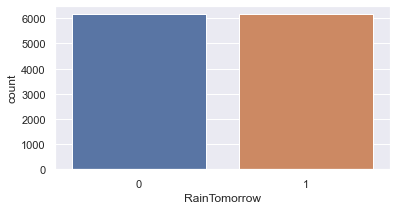

In [62]:
sns.countplot(y,data= rain)

## Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x= scaler.fit_transform(X)


In [64]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [65]:
x= pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.090909,0.508251,0.434911,0.560321,0.472984,0.444575,0.866667,0.633187,0.866667,0.933333,0.621872,0.521739,0.646341,0.172043,0.233244,0.280323,1.000,0.875,0.460123,0.442073,0.0,0.0,1.0
1,0.090909,0.310231,0.500000,0.000000,0.472984,0.444575,0.933333,0.633187,0.400000,1.000000,0.211238,0.478261,0.317073,0.204301,0.310992,0.299191,0.875,0.875,0.469325,0.518293,0.0,0.0,1.0
2,0.090909,0.491749,0.517751,0.000000,0.472984,0.444575,1.000000,0.656508,0.866667,1.000000,0.602358,0.565217,0.243902,0.258065,0.230563,0.323450,0.875,0.250,0.585890,0.484756,0.0,0.0,1.0
3,0.090909,0.369637,0.585799,0.000000,0.472984,0.444575,0.266667,0.359663,0.600000,0.000000,0.425009,0.195652,0.329268,0.107527,0.498660,0.433962,0.875,0.875,0.496933,0.585366,0.0,0.0,1.0
4,0.090909,0.643564,0.713018,0.702649,0.472984,0.444575,0.866667,0.597129,0.066667,0.466667,0.313986,0.434783,0.780488,0.290323,0.316354,0.250674,0.875,1.000,0.487730,0.682927,0.0,0.0,1.0


- Our data is scaled

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X1= scaler.fit_transform(x1)


In [182]:
X1= pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.090909,0.508251,0.434911,0.472984,0.444575,0.866667,0.633187,0.866667,0.933333,0.621872,0.521739,0.646341,0.172043,0.233244,0.280323,1.000,0.875,0.460123,0.442073,0.0,0.0
1,0.090909,0.310231,0.500000,0.472984,0.444575,0.933333,0.633187,0.400000,1.000000,0.211238,0.478261,0.317073,0.204301,0.310992,0.299191,0.875,0.875,0.469325,0.518293,0.0,0.0
2,0.090909,0.491749,0.517751,0.472984,0.444575,1.000000,0.656508,0.866667,1.000000,0.602358,0.565217,0.243902,0.258065,0.230563,0.323450,0.875,0.250,0.585890,0.484756,0.0,0.0
3,0.090909,0.369637,0.585799,0.472984,0.444575,0.266667,0.359663,0.600000,0.000000,0.425009,0.195652,0.329268,0.107527,0.498660,0.433962,0.875,0.875,0.496933,0.585366,0.0,0.0
4,0.090909,0.643564,0.713018,0.472984,0.444575,0.866667,0.597129,0.066667,0.466667,0.313986,0.434783,0.780488,0.290323,0.316354,0.250674,0.875,1.000,0.487730,0.682927,0.0,0.0


## Model Building

### Classification Model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
MaxAcc = 0
MaxRS =0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf= rf.predict(x_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
print('Best accuracy is', MaxAcc,'at random state', MaxRS)

accuracy 0.9391727493917275 random_state 1
accuracy 0.927007299270073 random_state 1
accuracy 0.9290348742903487 random_state 1
accuracy 0.9363341443633414 random_state 1
accuracy 0.9367396593673966 random_state 1
accuracy 0.9286293592862936 random_state 1
accuracy 0.9444444444444444 random_state 1
accuracy 0.9375506893755069 random_state 1
accuracy 0.9420113544201135 random_state 1
accuracy 0.9416058394160584 random_state 1
accuracy 0.9363341443633414 random_state 1
accuracy 0.9310624493106245 random_state 1
accuracy 0.9310624493106245 random_state 1
accuracy 0.9282238442822385 random_state 1
accuracy 0.9468775344687753 random_state 1
accuracy 0.9359286293592863 random_state 1
accuracy 0.9412003244120033 random_state 1
accuracy 0.9294403892944039 random_state 1
accuracy 0.9253852392538524 random_state 1
accuracy 0.940389294403893 random_state 1
accuracy 0.9355231143552312 random_state 1
accuracy 0.9322789943227899 random_state 1
accuracy 0.9399837793998378 random_state 1
accuracy 0.93

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)


In [76]:
from sklearn.model_selection import cross_val_score


In [77]:
algorithm = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC()]
for i in algorithm:
    print(i)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    
    print('Accuracy: ',accuracy_score(y_test,pred))
    print('Confusion matrix: ',confusion_matrix(y_test,pred))
    print('Classification report: ',classification_report(y_test,pred))
    cv = cross_val_score(i,x,y,cv=10)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', accuracy_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)

LogisticRegression()
Accuracy:  0.7753446877534469
Confusion matrix:  [[1457  369]
 [ 462 1411]]
Classification report:                precision    recall  f1-score   support

           0       0.76      0.80      0.78      1826
           1       0.79      0.75      0.77      1873

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699

Cross Validation Score:  0.7399026763990267
Difference in cross val score 0.035442011354420155
****************************************************************************************************
RandomForestClassifier()
Accuracy:  0.9264666125979995
Confusion matrix:  [[1676  150]
 [ 122 1751]]
Classification report:                precision    recall  f1-score   support

           0       0.93      0.92      0.92      1826
           1       0.92      0.93      0.93      1873

    accuracy                           0.93      3699
   macro avg 

- DecisionTreeClassifier will be selected as our best model as it as the least difference in score when cross validated

### Hyperparameter tuning

In [153]:
splitter=['best', 'random']
#Number of features to consider at every split
max_features= ['auto', 'sqrt', 'log2']
#Max levels in tree
max_depth=[10,20,30,40,50]
#Minimum number of samples required to split node
min_samples_split = [3,4,5,6,7,8,9]
#The function to measure the quality of a split. 
criterion=['gini','entropy']



In [154]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'splitter': splitter,'max_features': max_features,'max_depth':max_depth,'criterion':criterion,'min_samples_split':min_samples_split}

In [155]:
RCV=RandomizedSearchCV(DecisionTreeClassifier(),parameters,cv=10,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy'}

In [156]:
type(RCV)

sklearn.model_selection._search.RandomizedSearchCV

In [157]:
RCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_split=3)

In [158]:
RCV_pred = RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.863206271965396

## ROC Curve

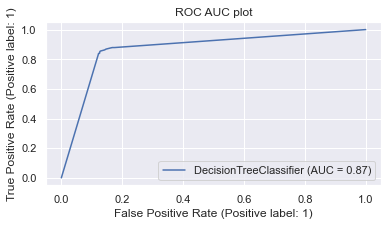

In [159]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

- Our final accuracy score is 86.32% with AUC score as 87%

#### Saving best model

In [160]:
import joblib

In [161]:
joblib.dump(RCV.best_estimator_,'RainfallForecastClassification.pkl')

['RainfallForecastClassification.pkl']

## Regression Model

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

In [193]:
MaxR2 = 0
MaxRS =0
for i in range(1,100):
    X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.30,random_state=i)
    r = RandomForestRegressor()
    r.fit(X1_train,y1_train)
    predr= r.predict(X1_test)
    acc= r2_score(y1_test,predr)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best r2 score is', MaxR2,'at random state', MaxRS)

accuracy 0.661576328715727 random_state 1
accuracy 0.6719450606936026 random_state 1
accuracy 0.6336808045148438 random_state 1
accuracy 0.6315083309155088 random_state 1
accuracy 0.603831683573835 random_state 1
accuracy 0.6169010372320984 random_state 1
accuracy 0.6010527306757663 random_state 1
accuracy 0.6182823117041811 random_state 1
accuracy 0.6589801379849655 random_state 1
accuracy 0.6190139062345377 random_state 1
accuracy 0.6089176798065563 random_state 1
accuracy 0.6526554495121051 random_state 1
accuracy 0.6438780823290575 random_state 1
accuracy 0.6199119135656989 random_state 1
accuracy 0.6336347568828244 random_state 1
accuracy 0.6446932509986076 random_state 1
accuracy 0.6615600882975026 random_state 1
accuracy 0.6464503961805239 random_state 1
accuracy 0.6288796169649538 random_state 1
accuracy 0.6585645892571591 random_state 1
accuracy 0.6578861382709701 random_state 1
accuracy 0.6463724053128341 random_state 1
accuracy 0.6306876380196111 random_state 1
accuracy 0.61

In [194]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.30,random_state=79)


In [197]:
algorithm = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SVR()]
for i in algorithm:
    print(i)
    i.fit(X1_train,y1_train)
    pred = i.predict(X1_test)
    
    print('R2 score: ',r2_score(y1_test,pred))
    print('MAE: ',mean_absolute_error(y1_test,pred))
    print('MSE: ',mean_squared_error(y1_test,pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y1_test,pred)))
    cv = cross_val_score(i,X1,y1,cv=10)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', r2_score(y1_test,pred)- abs(cv.mean()))
    print('**'*50)
    

LinearRegression()
R2 score:  0.4927041409593764
MAE:  1.5319033235428998
MSE:  10.321339445020023
RMSE:  3.212684149588942
Cross Validation Score:  0.4905586570737833
Difference in cross val score 0.0021454838855931024
****************************************************************************************************
RandomForestRegressor()
R2 score:  0.6705043052104251
MAE:  0.9903270755110555
MSE:  6.703853088861076
RMSE:  2.5891800031788206
Cross Validation Score:  0.6498023373680817
Difference in cross val score 0.02070196784234346
****************************************************************************************************
DecisionTreeRegressor()
R2 score:  0.27809352359043127
MAE:  1.1508135168961202
MSE:  14.687763871506052
RMSE:  3.832461855192567
Cross Validation Score:  0.44094555399302715
Difference in cross val score -0.16285203040259588
****************************************************************************************************
KNeighborsRegressor()
R2 sco

- RandomForestRegression will be selected as our best model even though LogisticRegression had a lower differece with crossvalidation. This is because LogisticRegression had a very low r2 score

## Hyperparameter Tuning

In [221]:
n_estimators= [int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['sqrt','log2']
max_depth=[6,7,8,9,10,11]
min_samples_split = [2,5]
criterion=['squared_error', 'absolute_error', 'poisson']
bootstrap =[True,False]


In [222]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': n_estimators,'max_features': max_features,'max_depth':max_depth,'criterion':criterion,'min_samples_split':min_samples_split,'bootstrap':bootstrap}

In [ ]:
rcv=RandomizedSearchCV(RandomForestRegressor(),parameters,cv=10)
rcv.fit(X1_train,y1_train)
rcv.best_params_

In [ ]:
type(rcv)

In [ ]:
rcv.best_estimator_

In [ ]:
rcv_pred = rcv.best_estimator_.predict(X1_test)
r2_score(y1_test,rcv_pred)

## Model Saving

In [224]:
joblib.dump(RandomForestRegressor(),'RainfallForecastRegression.pkl')

['RainfallForecastRegression.pkl']